loading survival probability from spatiocyte simulation data of A+B>B, and calculate the k(t)

In [45]:
import glob
import numpy as np
import matplotlib.pyplot as plt
L=700
pattern = '/home/kaizu/src/ecell4-develop/wxchew2017/res'+str(L)+'/keffc_100_'+str(L)+'_*'
filenames = glob.glob(pattern)
data = None

for i in range(10000):
    i+=1
    filename='/home/kaizu/src/ecell4-develop/wxchew2017/res'+str(L)+'/keffc_100_'+str(L)+'_'+str(i)
    if data is None:       
        data = np.loadtxt(filename, delimiter=',')
        yy = data.T[1]
    else:
        data = np.loadtxt(filename, delimiter=',')
        yy=np.vstack((yy,data.T[1]))        
St =np.mean(yy,axis=0)/4000
Std = np.std(yy,axis=0)/4000
t=data.T[0]

In [46]:
lag=1
st=St[::lag]
tt=t[::lag]
std=Std[::lag]

[ 0.99876328  0.9983767   0.99802313] [  1.74206515e-05   3.47814381e-05   5.21422248e-05]


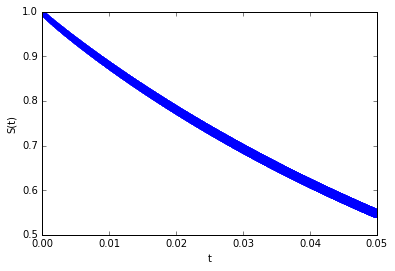

In [47]:
print(st[:3],tt[:3])
plt.errorbar(tt,st,std)
plt.xlabel('t')
plt.ylabel('S(t)')

In [48]:
N=4000
if L==700: 
    V= 43.46455449419419
else:
    V=5.486249703951731
from scipy.optimize import curve_fit
import math
D=1
rm=0.005
kd= 4.0*math.pi*D*2*rm
ka = 100*kd
kon = (ka*kd)/(ka+kd)
Bck=ka * (2*rm) / (ka + kd)/math.sqrt(D) / math.sqrt(math.pi)
def stt(t,kon,Bt,N,V):
    return np.exp((kon * (t + Bt * np.sqrt(t)))*(-N/V))
def latkt(t,A,B):
    return A*(1+B/(t)**0.5)  

In [49]:
from numpy import sqrt
from scipy import special
def Phi(xx):
    return special.erfcx(xx)
Bck=ka * (2*rm) / (ka + kd)/math.sqrt(D) / math.sqrt(math.pi)
tau = ((ka*2*rm/(ka+kd))**2)/(D)


/home/chew/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1654.94442003
[ 0.12441951  0.01117207 -1.        ]


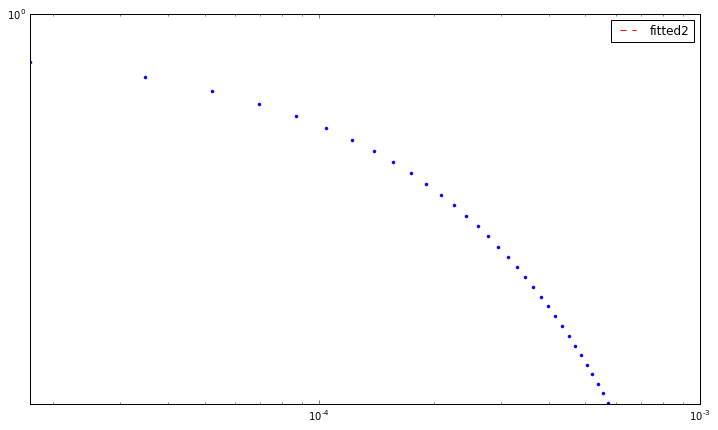

In [87]:
aeff = ka * (2 * rm) / (ka + kd)
def fitst1(tt,A,B):
    intk=A*(tt+B*sqrt(tt))
    return [np.exp(-i*N/V) for i in intk]

def fitst2(tt,A,B,C):
    #intk=A*(tt+B*sqrt(tt)+C)
    intk=A*(tt+B*sqrt(tt)+C*np.log(tt))
    return [np.exp(-i*N/V) for i in intk]

fig,ax1=plt.subplots(1,1,figsize=(12,7))
lg=1
#popt1,pcov1 = curve_fit(fitst1,tt[lg:],st[lg:],p0=[kon,2*Bck],sigma=std[lg:])
popt2,pcov2 = curve_fit(fitst2,tt[lg:],st[lg:],p0=[kon,2*Bck,-1],sigma=std[lg:])
#plt.errorbar(tt,st,std,color='g')
plt.plot(tt,st,'.')
#plt.loglog(tt[lg:],fitst1(tt[lg:],*popt1),'g--',label='fitted1')
plt.loglog(tt[lg:],fitst2(tt[lg:],*popt2),'r--',label='fitted2')
#plt.plot(tt,stt(intkt1),'r-',label='exact')
plt.legend()
#ax1.set_ylim(0.126,0.134)
er=lambda x,y:(x-y)*100/x
perr = np.sqrt(np.diag(pcov))
#r1=st-fitst1(tt,*popt1)
r2=st-fitst2(tt,*popt2)
#print(sum(r1**2))
print(sum(r2**2))
#meansq=sum(r**2)
#chisq=sum((r/std)**2)
plt.ylim(0.99,1)
plt.xlim(0,0.001)
print(popt2)
#print(meansq,chisq)
#print('kon={:.5},konfit={:.5}pm{:.5},diff={:.5},{:.5}%'.format(kon,popt[0],perr[0],kon-popt[0],er(kon,popt[0])))
#print('Btheory={:.5},Bfit={:.5}pm{:.5},diff={:.5},{:.5}%'.format(2*Bck,popt[1],perr[1],2*Bck-popt[1],er(2*Bck,popt[1])))
#print('Ctheory={:.5},Cfit={:.5}pm{:.5},diff={:.5}%'.format(-aeff**2 *kd/D/ka,popt[2],perr[2],er(-aeff**2 *kd/D/ka,popt[2])))
#print('Preb',1./(1+1./100),1-popt[0]/ka)
#print(popt[0]/kon)


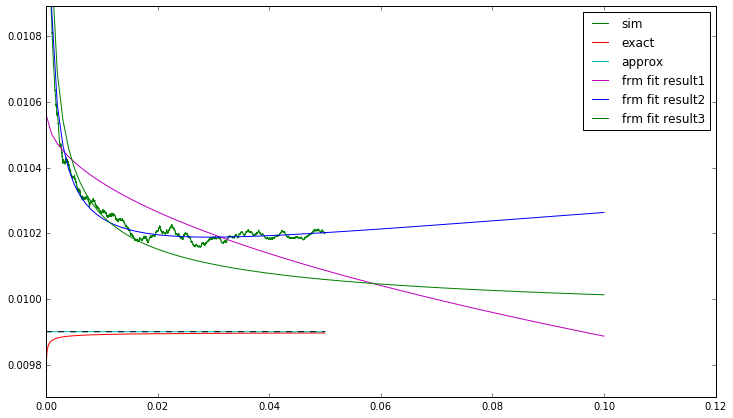

In [58]:
Bck=ka * (2*rm) / (ka + kd)/math.sqrt(D) / math.sqrt(math.pi)
intkt1 = [kon*(t+(kd*tau/ka)*(2*ka*sqrt(t/tau/math.pi)/kd-1+Phi(ka*sqrt(t/tau)/kd))) for t in tt]
intkt2= [kon * (t + 2*Bck * np.sqrt(t)) for t in tt]

def stt(intkt):
    return [np.exp(-i*N/V) for i in intkt]

def geta(st,t):
    return (-np.log(st)/kon/(N/V)-t)*sqrt(math.pi*D/t)/2

fig,ax1=plt.subplots(1,1,figsize=(12,7))
asim=geta(st,tt)
a1=geta(stt(intkt1),tt)
a2=geta(fitst1(tt,kon,2*Bck),tt)
plt.plot(tt,asim,'g-',label='sim')
plt.plot(tt,a1,'r-',label='exact')
plt.plot(tt,a2,'c-',label='approx')

tlong=np.linspace(tt[0],0.1,100)
afit1=geta(fitst1(tlong,*popt1),tlong)
afit2=geta(fitst2(tlong,*popt2),tlong)
afit3=geta(fitst3(tlong,*popt3),tlong)
plt.plot(tlong,afit1,'m-',label='frm fit result1')
plt.plot(tlong,afit2,'b-',label='frm fit result2')
plt.plot(tlong,afit3,'g-',label='frm fit result3')
plt.plot(tt,[aeff]*len(tt),'k--')
plt.ylim(aeff*0.98,aeff*1.1)
plt.legend()

/home/chew/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  1.24568353e-01   1.73439431e+08]
[[ inf  inf]
 [ inf  inf]]
100545947.408


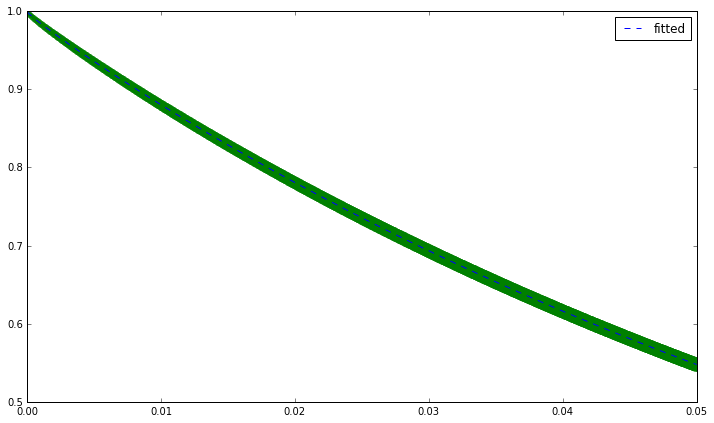

In [180]:
aeff = ka * (2 * rm) / (ka + kd)

def fitst2(t,A,B):
    intk=A*(t+(4*rm/(1+1/B))*sqrt(t/math.pi/D)+(4*rm**2/D/B/(1+1./B)**2)*(Phi((B*(1+1/B)/2/rm)*sqrt(D*t))-1))
    return [np.exp(-i*N/V) for i in intk]

fig,ax1=plt.subplots(1,1,figsize=(12,7))

popt,pcov = curve_fit(fitst2,tt,st,p0=[kon,100])#,sigma=std)
plt.errorbar(tt,st,std,color='g')
#plt.plot(tt,st,'.')
plt.plot(tt,fitst2(tt,*popt),'b--',label='fitted')
#plt.plot(tt,stt(intkt1),'r-',label='exact')
plt.legend()
#ax1.set_ylim(0.126,0.134)
er=lambda x,y:(x-y)*100/x
perr = np.sqrt(np.diag(pcov))
r=st-fitst(tt,*popt)
chisq=sum((r/std)**2)
print(popt)
print(pcov)
print(chisq)
#print('kon={:.5},konfit={:.5}pm{:.5},diff={:.5}%'.format(kon,popt[0],perr[0],er(kon,popt[0])))
#print('Btheory={:.5},Bfit={:.5}pm{:.5},diff={:.5}%'.format(2*Bck,popt[1],perr[1],er(2*Bck,popt[1])))
#print('Ctheory={:.5},Cfit={:.5}pm{:.5},diff={:.5}%'.format(-aeff**2 *kd/D/ka,popt[2],perr[2],er(-aeff**2 *kd/D/ka,popt[2])))
#print('Preb',1./(1+1./100),1-popt[0]/ka)
#print(popt[0]/kon)

In [18]:
print('kon',kon,'fit',popt[0],'pm',perr[0],'diff',er(kon,popt[0]),'%')
print('Bck',Bck,'fit',popt[1],'pm',perr[1],'diff',er(Bck,popt[1]),'%')

kon 0.12441951103325916 fit 0.124562146469 pm 7.08743020373e-05 diff -0.114640729932 %
Bck 0.005586035480670855 fit 0.00553307186722 pm 6.39551275721e-05 diff 0.948143162269 %


In [187]:
def conc(fac,Na,Nb):
    rm=0.005
    L=fac*rm
    V=L**3
    Nt=Na+Nb
    v=4*3.14*rm**3/3
    print(Na*100*v/V,Nb*100*v/V,Nt*100*v/V)

In [188]:
conc(350,4000,4000),conc(700,4000,4000)

0.03905928085519923 0.03905928085519923 0.07811856171039847
0.004882410106899904 0.004882410106899904 0.009764820213799808


(None, None)

In [189]:
conc(350,500,4000),conc(525,1682,4000)

0.004882410106899904 0.03905928085519923 0.043941690962099135
0.004866497066551489 0.011573120253392364 0.016439617319943853


(None, None)